## We want be able to determine computing time for our code in. order to optimize its efficiency. Be aware that there are various notions of time we could be talking about. There is the familiar notion of _clock time_, which is the amount of real physical time that is elapsed between two positions in code.

## Clock time isn't usually suitable for our purposes because the computer is performing many tasks simultaneously, and the elapsed time for a program to run will depend on the degree to which computational resources can be devoted to the task of running that program.

## So we also have the notion of process time, which measures the amount of CPU and system time for a program to run.


In [49]:
import time
import numpy as np

process_time_start = time.process_time()
print("process time starting time = "+str(process_time_start))

N=1000000
for n in range(N):
    x=np.random.uniform()

process_time_end=time.process_time()
print("process time ending time = "+str(process_time_end))
print("process_time time difference = "+str(process_time_end-process_time_start))


process time starting time = 93.921875
process time ending time = 94.859375
process_time time difference = 0.9375


## Now we can try to answer which is faster, a loop or list comprehension for a special case.

In [50]:
import time
import numpy as np

N=1000000

process_time_start = time.process_time()
L=[]
for n in range(N):
    x=np.random.uniform()
    L.append(x)
process_time_end=time.process_time()
timediff1=process_time_end-process_time_start
print("process_time time difference = "+str(timediff1))

process_time_start = time.process_time()
L=[np.random.uniform() for n in range(N)]
process_time_end=time.process_time()
timediff2=process_time_end-process_time_start
print("process_time time difference = "+str(timediff2))

print("ratio = ", timediff2/timediff1)


process_time time difference = 1.328125
process_time time difference = 1.0
ratio =  0.7529411764705882


## We can try to speed up the loop version by avoiding append.

In [51]:
import time
import numpy as np

N=1000000

process_time_start = time.process_time()
L=[0 for n in range(N)]
for n in range(N):
    x=np.random.uniform()
    L[n]=x
process_time_end=time.process_time()
timediff1=process_time_end-process_time_start
print("process_time time difference = "+str(timediff1))

process_time_start = time.process_time()
L=[np.random.uniform() for n in range(N)]
process_time_end=time.process_time()
timediff2=process_time_end-process_time_start
print("process_time time difference = "+str(timediff2))

print("ratio = ", timediff2/timediff1)

process_time time difference = 1.078125
process_time time difference = 0.875
ratio =  0.8115942028985508


## That was a little closer. What about removing the intermediate assignment to the x variable.

In [52]:
import time
import numpy as np

N=1000000

process_time_start = time.process_time()
L=[0 for n in range(N)]
for n in range(N):
    L[n]=np.random.uniform()
process_time_end=time.process_time()
timediff1=process_time_end-process_time_start
print("process_time time difference = "+str(timediff1))

process_time_start = time.process_time()
L=[np.random.uniform() for n in range(N)]
process_time_end=time.process_time()
timediff2=process_time_end-process_time_start
print("process_time time difference = "+str(timediff2))

print("ratio = ", timediff2/timediff1)

process_time time difference = 1.09375
process_time time difference = 0.890625
ratio =  0.8142857142857143


#  Comparing two methods for generating normal random variables.

# The Polar Method

## Here, we use the following basic fact. If $X$ and $Y$ are independent $N(0,1)$ random variables, if we let the polar coordinates of $(X,Y)$  be $(R,\Theta)$ then $R^2 \sim \chi^2_2,$ and $\Theta  \sim \mbox{Uniform}(0,2\pi)$ and $R$ and $\Theta$ are independent. The $\chi^2_2$ distribution has cdf $F(x) = 1-\exp(-x/2)$ for $x>0.$ So sampling of this distribution can be done using the inversion method. $F^{-1}(u) =- 2 \log(1-u).$ Once we know $R^2$ we can get $R$ and then take $X = R \cos(\Theta)$ and $X = R \cos(\Theta)$ where $\Theta$ is independent of $R$ and uniformly distributed in the interval $(0,2\pi).$ 

In [6]:
import numpy as np
#
# returns two independent standard normals
#
def polar_method():
    u=np.random.uniform()
    rsq=-2*np.log(1-u)
    r=np.sqrt(rsq)
    theta=2*np.pi*np.random.uniform()
    x=r*np.cos(theta)
    y=r*np.sin(theta)
    return((x,y))


## To create a list of N (N even) values, we can use the polar method N/2 times and the flattening idea.

In [32]:
L=[polar_method() for n in range(5)]
print(L)
M=[x for y in L for x in y]
print(M)

[(0.46228552667393674, -0.26895930879219465), (0.8333269037296142, 0.8045221300424853), (-1.3225593649604415, 0.027482939172073274), (0.2801846684422909, 0.4864722690125014), (0.415244057255707, 1.1007537501701974)]
[0.46228552667393674, -0.26895930879219465, 0.8333269037296142, 0.8045221300424853, -1.3225593649604415, 0.027482939172073274, 0.2801846684422909, 0.4864722690125014, 0.415244057255707, 1.1007537501701974]


## Or more compactly

In [33]:
L=[x for n in range(5) for x in polar_method()]
print(L)

[-1.1621255409756752, 0.15991693429828346, -1.787147423395049, 0.14169761627569635, 0.1677075592518738, -0.4009038950606097, 1.1658811032343444, 1.209868146664507, 0.41281909905974307, 0.8490108408335603]


## Quick check that this worked. Do we get approximately the right proportion of values whose absolute value is less than 1?

In [19]:
N=50000
len([x for n in range(N) for x in polar_method() if np.abs(x)<1])/(2*N)

0.68257

## For the rejection method, the normal pdf 

## $$ f(x) = {1\over \sqrt{2\pi}} e^{-\frac{1}{2}x^2}$$

## is bounded above by the scaled double-exponential pdf i.e.

## $$ f(x) \leq c g(x)$$

## where

## $$ g(x) = \frac{1}{2} e^{-\vert x \vert} $$

## is the double-exponential pdf, and

## $$ c = 2 \sqrt{\frac{e}{2 \pi}} \approx 1.315 $$

## This leads to the following algorithm. 
## Repeat:
## > Generate having an Exponential(1) distribution
## > Generate Y uniform in the interval [0,c*g(X)]
## Until Y < f(X)
## Change the sign of X with probability 1/2
## Return(X)

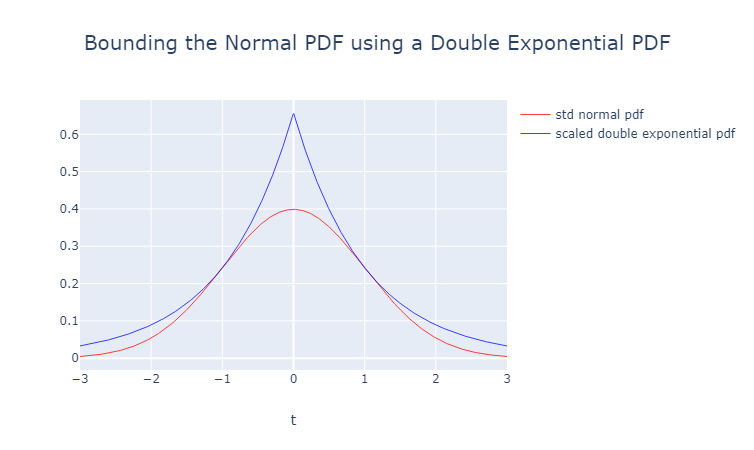

In [93]:
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

T=np.linspace(-3,3,1000)

# std normal pdf
def f(x):
    return((1/np.sqrt(2*np.pi))*np.exp(-.5*x*x))
fnew=np.frompyfunc(f,1,1)
y=fnew(T)

# scaled double exponential pdf
def cg(x):
    c=2*np.sqrt(.5*np.e/np.pi)
    g=.5*np.exp(-np.abs(x))
    return(c*g)
cgnew=np.frompyfunc(cg,1,1)
z=cgnew(T)

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=T, y=y,
                    line=dict(color='red', width=.75),
                    mode='lines',
                    name='std normal pdf'))
fig.add_trace(go.Scatter(x=T, y=z,
                    line=dict(color='blue', width=.75),
                    mode='lines',
                    name='scaled double exponential pdf'))

fig.update_layout(title=dict(text="Bounding the Normal PDF using a Double Exponential PDF",x=.5,font_size=20))
fig.update_layout(xaxis=dict(title="t",title_font_size=15))
fig.update_layout(yaxis=dict(title="",title_font_size=15))
fig.update_layout(showlegend=True)
fig.show()

In [26]:
#
# rejection method 
#
def rejection_method():
    c=2*np.sqrt(np.e/(2.*np.pi))       
    d=1./np.sqrt(2*np.pi)
    while True:
        u=np.random.uniform()
        x=-np.log(u)
        y=c*.5*np.exp(-np.abs(x))
        v=np.random.uniform()
        if y*v<d*np.exp(-.5*x*x):
            w=np.random.uniform()
            if w<.5:
                return(x)
            else:
                return(-x)

In [30]:
N=100000
L=[rejection_method() for n in range(N)]
len([x for x in L if np.abs(x)<1])/N

0.68228

## We now have two methods for sampling from the standard normal distribution. Which is more efficient?

In [36]:
import time
import numpy as np

N=100000
M=50000
process_time_start = time.process_time()
L=[x for n in range(M) for x in polar_method()]
process_time_end=time.process_time()
timediff1=process_time_end-process_time_start
print("process_time time difference = "+str(timediff1))

process_time_start = time.process_time()
L=[rejection_method() for n in range(N)]
process_time_end=time.process_time()
timediff2=process_time_end-process_time_start
print("process_time time difference = "+str(timediff2))

process_time time difference = 0.484375
process_time time difference = 1.34375


In [46]:
#
# revised rejection method 
#
def rejection_method():
    cd=np.sqrt(np.e)/np.pi
    while True:
        u=np.random.uniform()
        x=-np.log(u)
        y=np.exp(-np.abs(x))
        v=np.random.uniform()
        if y*v<cd*np.exp(-.5*x*x):
            w=np.random.uniform()
            if w<.5:
                return(x)
            else:
                return(-x)

In [47]:
N=100000
L=[rejection_method() for n in range(N)]
len([x for x in L if np.abs(x)<1])/N

0.68508

In [48]:
import time
import numpy as np

N=100000
M=50000
process_time_start = time.process_time()
L=[x for n in range(M) for x in polar_method()]
process_time_end=time.process_time()
timediff1=process_time_end-process_time_start
print("process_time time difference = "+str(timediff1))

process_time_start = time.process_time()
L=[rejection_method() for n in range(N)]
process_time_end=time.process_time()
timediff2=process_time_end-process_time_start
print("process_time time difference = "+str(timediff2))

process_time time difference = 0.484375
process_time time difference = 1.46875
